# SVM (Support Vector Machine)

**하이퍼 파라미터**

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

In [159]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")

model.fit(x_train, y_train)
model.score(x_test, y_test)

1.0

In [160]:
# 시각화를위한 데이터 준비 (데이터프레임 생성 -> 특성 두 개만 이용)
df = pd.DataFrame(iris_data.data[:, :2], columns=iris_data.feature_names[:2])
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [161]:
# 훈련/테스트 데이터 분리 
x = iris_data.data[:, :2]
y = iris_data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [162]:
# 모델 학습 및 평가
svm_clf = SVC(kernel='linear', C=0.1)

svm_clf.fit(x_train, y_train)
svm_clf.score(x_train, y_train), svm_clf.score(x_test, y_test)

(0.775, 0.8333333333333334)

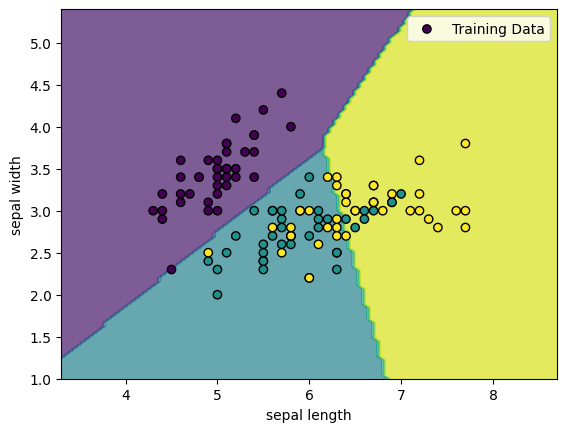

In [163]:
# 시각화
from sklearn.inspection import DecisionBoundaryDisplay

# 결정 경계
DecisionBoundaryDisplay.from_estimator(svm_clf, x_train, alpha=0.7)

# 훈련데이터 산정도
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', label="Training Data")

plt.xlabel('sepal length')
plt.ylabel('sepal width')

# 범례 -> Training Data라는 표시
plt.legend()
plt.show()

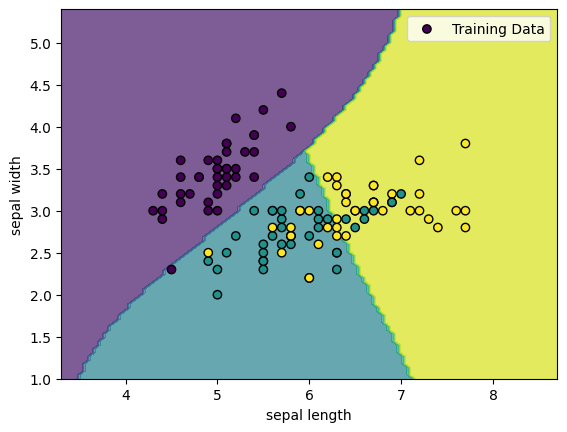

In [164]:
# RBF 커널 사용 시각화
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.5)

svm_clf.fit(x_train, y_train)
# svm_clf.score(x_train, y_train), svm_clf.score(x_test, y_test)

# 결정 경계
dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, x_train, alpha=0.7)

# 훈련데이터 산정도
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', label="Training Data")

plt.xlabel('sepal length')
plt.ylabel('sepal width')

# 범례 -> Training Data라는 표시
plt.legend()
plt.show()

# SVR (Support Vector Regressor)

In [165]:
np.random.seed(0)
x = np.sort(np.random.rand(40, 1) * 5, axis=0)
y = np.sin(x).ravel() + np.random.randn(40) * 0.1

x_test = np.linspace(0, 5, 100).reshape(-1, 1)

In [166]:
# 모델 학습 및 예측
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

# 학습
svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

# 예측
rbf_pred = svr_rbf.predict(x_test)
lin_pred = svr_lin.predict(x_test)
poly_pred = svr_poly.predict(x_test)

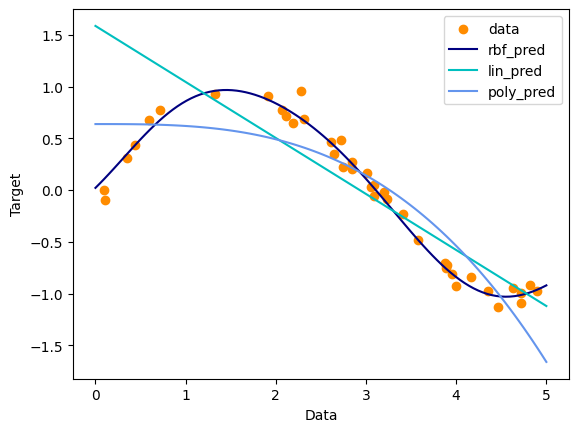

In [167]:
# 결과 시각화
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x_test, rbf_pred, color='navy', label='rbf_pred')
plt.plot(x_test, lin_pred, color='c', label='lin_pred')
plt.plot(x_test, poly_pred, color='cornflowerblue', label='poly_pred')

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

##### 캘리포니아 주택 가격 예측

In [168]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing_data = fetch_california_housing()

In [172]:
# 데이터 분리 및 스케일링

x = housing_data.data
y = housing_data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()


In [175]:
# SVR 모델 훈련 및 평가
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# 학습
svr_rbf.fit(x_train_scaled, y_train_scaled)

# 평가
y_pred_scaled = svr_rbf.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
mse

0.35415096003813096

In [ ]:
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x_test, rbf_pred, color='navy', label='rbf_pred')

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()